(array([0.15827564, 0.        , 0.        , 0.        , 0.        ,
        0.31655128, 0.63310256, 0.31655128, 0.47482692, 0.15827564,
        0.7913782 , 0.7913782 , 1.10792949, 1.26620513, 2.69068589,
        1.74103205, 2.53241025, 3.32378846, 2.05758333, 2.69068589,
        5.38137179, 5.22309615, 4.2734423 , 4.90654487, 6.01447435,
        6.9641282 , 8.23033332, 6.9641282 , 8.23033332, 8.38860896,
        6.64757692, 8.54688461, 6.80585256, 7.12240384, 6.64757692,
        5.22309615, 5.22309615, 3.95689102, 4.43171794, 1.74103205,
        2.84896154, 2.21585897, 2.37413461, 2.69068589, 1.10792949,
        0.94965385, 1.26620513, 0.47482692, 0.31655128, 0.63310256,
        0.15827564, 0.31655128, 0.15827564, 0.47482692, 0.15827564,
        0.        , 0.        , 0.        , 0.        , 0.15827564]),
 array([0.31675773, 0.32307582, 0.32939391, 0.335712  , 0.34203009,
        0.34834818, 0.35466628, 0.36098437, 0.36730246, 0.37362055,
        0.37993864, 0.38625673, 0.39257483, 0.

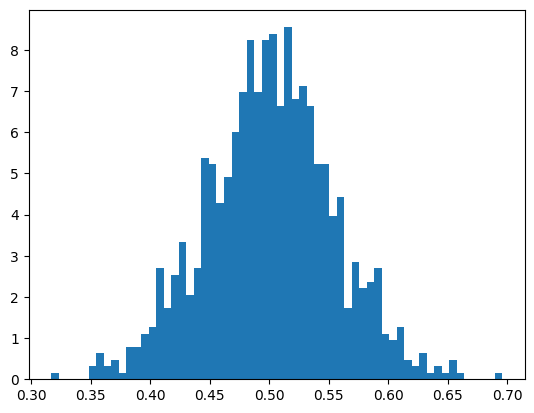

In [11]:
import numpy as np
import matplotlib.pyplot as plt

num_samples=1000
sample_size=30
distribution_range=(0,1)

samples=np.random.uniform(distribution_range[0],distribution_range[1],(num_samples,sample_size))

samples_mean=np.mean(samples,axis=1)
plt.hist(samples_mean,bins=60,density=True)   ## normal distribution

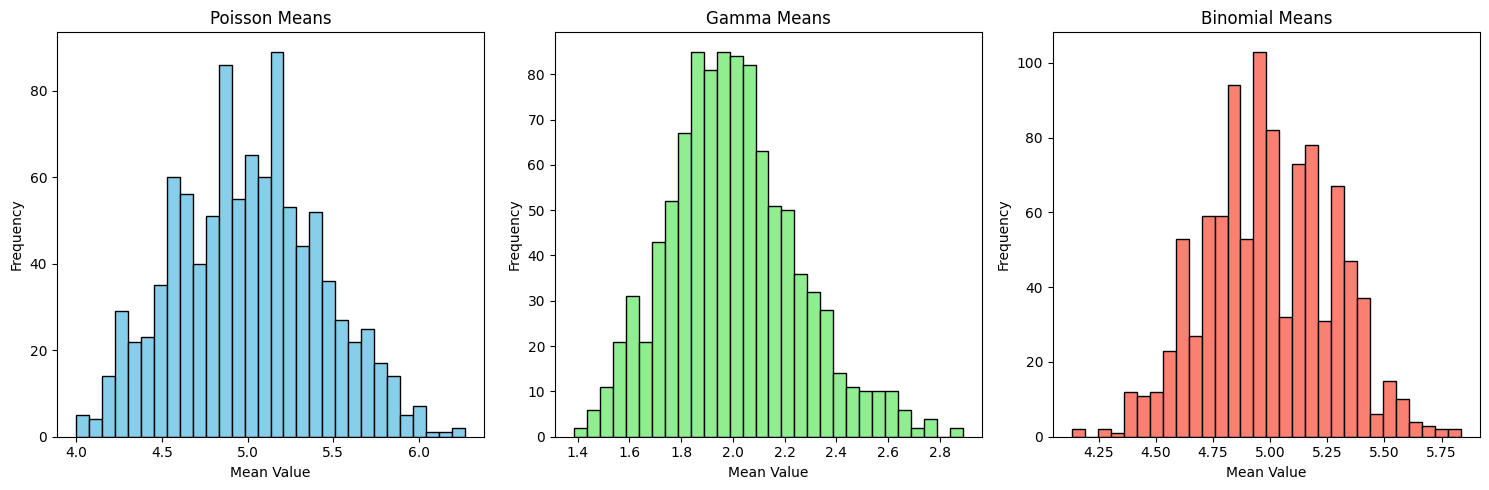

In [1]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 1000
sample_size = 30

## poisson 
poisson_lambda = 5
gamma_shape = 2
gamma_scale = 1
binomial_n = 10
binomial_p = 0.5

# Generate samples
poisson_samples = np.random.poisson(lam=poisson_lambda, size=(num_samples, sample_size))
gamma_samples = np.random.gamma(shape=gamma_shape, scale=gamma_scale, size=(num_samples, sample_size))
binomial_samples = np.random.binomial(n=binomial_n, p=binomial_p, size=(num_samples, sample_size))

# Compute means
poisson_mean = np.mean(poisson_samples, axis=1)
gamma_mean = np.mean(gamma_samples, axis=1)
binomial_mean = np.mean(binomial_samples, axis=1)

# Plot histograms in subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(poisson_mean, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title("Poisson Means")
axes[0].set_xlabel("Mean Value")
axes[0].set_ylabel("Frequency")

axes[1].hist(gamma_mean, bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title("Gamma Means")
axes[1].set_xlabel("Mean Value")
axes[1].set_ylabel("Frequency")

axes[2].hist(binomial_mean, bins=30, color='salmon', edgecolor='black')
axes[2].set_title("Binomial Means")
axes[2].set_xlabel("Mean Value")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


## test case -> 

In [2]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
total_df=pd.concat([train_df.drop(columns=["Survived"]),test_df])
total_df=total_df.sample(total_df.shape[0])

In [4]:
total_df.shape

(1309, 11)

<Axes: ylabel='Density'>

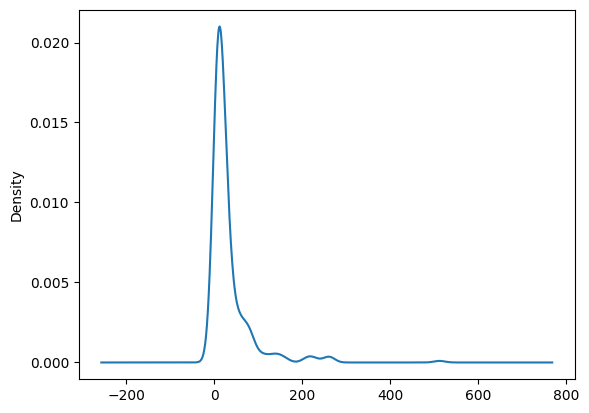

In [5]:
total_df["Fare"].plot(kind="kde")

In [6]:
## sample_size= 50 -> 100 times

samples=list()
for i in range(100):
    samples.append(total_df["Fare"].dropna().sample(50).tolist())

samples=np.array(samples)

In [7]:
samples.shape

(100, 50)

In [8]:
samples_mean=samples.mean(axis=1)

<Axes: ylabel='Density'>

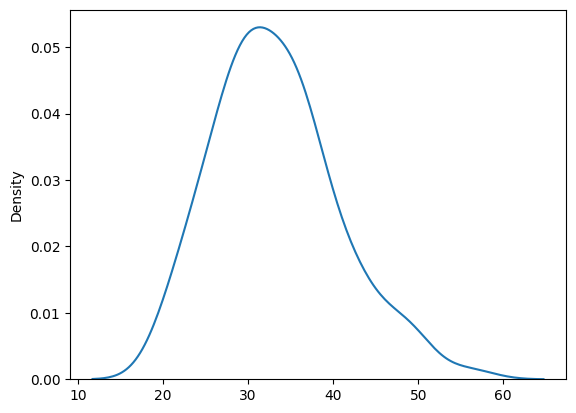

In [9]:
import seaborn as sns

sns.kdeplot(samples_mean)

In [33]:
propulation_mean=total_df["Fare"].dropna().mean()
propulation_variance=total_df["Fare"].dropna().var()

samples_mean1=samples_mean.mean()
samples_variance1=samples_mean.var()

smaple_size= 50 # n

print(f"Propulation -> mean {propulation_mean}  samples_mean  -> mean {samples_mean1}")
print(f"Propulation -> var {propulation_variance}  samples_mean -> var {samples_variance1}")
print()

Propulation -> mean 33.29547928134557  samples_mean  -> mean 33.24166402
Propulation -> var 2678.959737892891  samples_mean -> var 52.09863270881868



## propulatiopn mean interval 

In [27]:
samples_std=samples_mean.std()

low_limit=samples_mean1-2*samples_std
upper_limit=samples_mean1+2*samples_std

print( f" lower limit - {low_limit}  upper limit - {upper_limit}") ## That gives an approximate 95% confidence interval for the mean.

 lower limit - 18.80578750226563  upper limit - 47.67754053773437


In [12]:
print(samples_mean.std(),total_df["Fare"].dropna().std()/np.sqrt(50))

7.2179382588671865 7.319781059420959
